# Take Home Challenge
Ann Okafor - Springboard Data Science Career Track

## Part 1 ‐ Exploratory data analysis

In [1]:
import pandas as pd

# Load the JSON file into a DataFrame
file_path = 'logins.json'
logins_df = pd.read_json(file_path)

# Show the first few rows and the data structure
logins_df.head(), logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


(           login_time
 0 1970-01-01 20:13:18
 1 1970-01-01 20:16:10
 2 1970-01-01 20:16:37
 3 1970-01-01 20:16:36
 4 1970-01-01 20:26:21,
 None)

In [2]:
# Set login_time as the index
logins_df.set_index('login_time', inplace=True)

# Add a 'count' column to the DataFrame with a constant value of 1
logins_df['count'] = 1

# Resample the DataFrame to aggregate login counts based on 15-minute time intervals
logins_resampled = logins_df.resample('15T').sum()

# Show the first few rows of the resampled DataFrame
logins_resampled.head()


,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


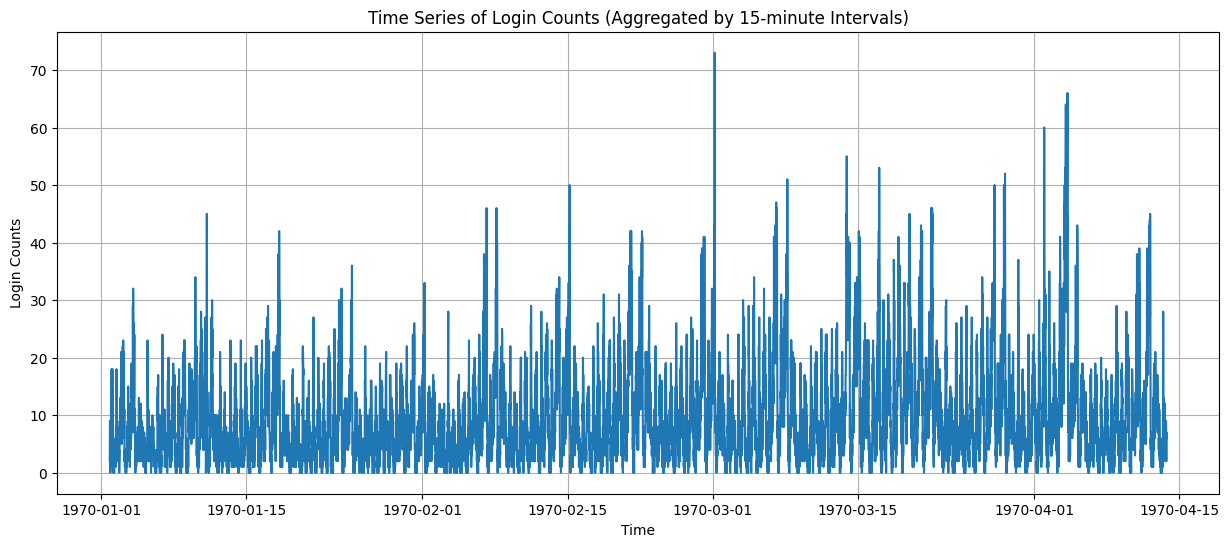

In [3]:
import matplotlib.pyplot as plt

# Plot the entire time series of login counts aggregated by 15-minute intervals
plt.figure(figsize=(15, 6))
plt.plot(logins_resampled.index, logins_resampled['count'])
plt.title('Time Series of Login Counts (Aggregated by 15-minute Intervals)')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.grid(True)
plt.show()


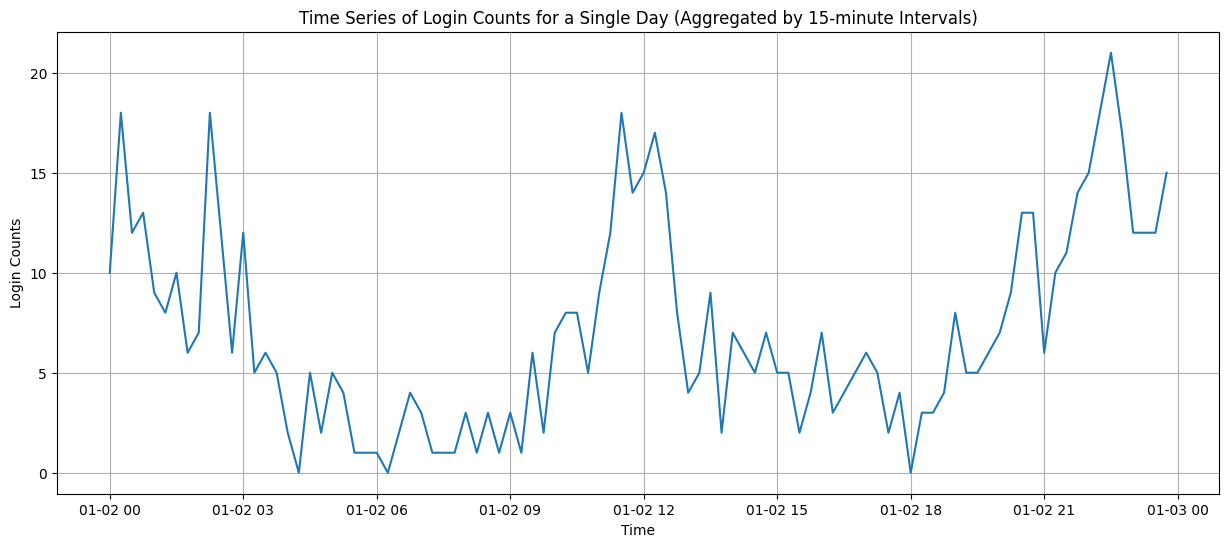

In [4]:
# Plot a single day's worth of login counts to see intraday patterns
single_day_data = logins_resampled.loc['1970-01-02']

plt.figure(figsize=(15, 6))
plt.plot(single_day_data.index, single_day_data['count'])
plt.title('Time Series of Login Counts for a Single Day (Aggregated by 15-minute Intervals)')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.grid(True)
plt.show()


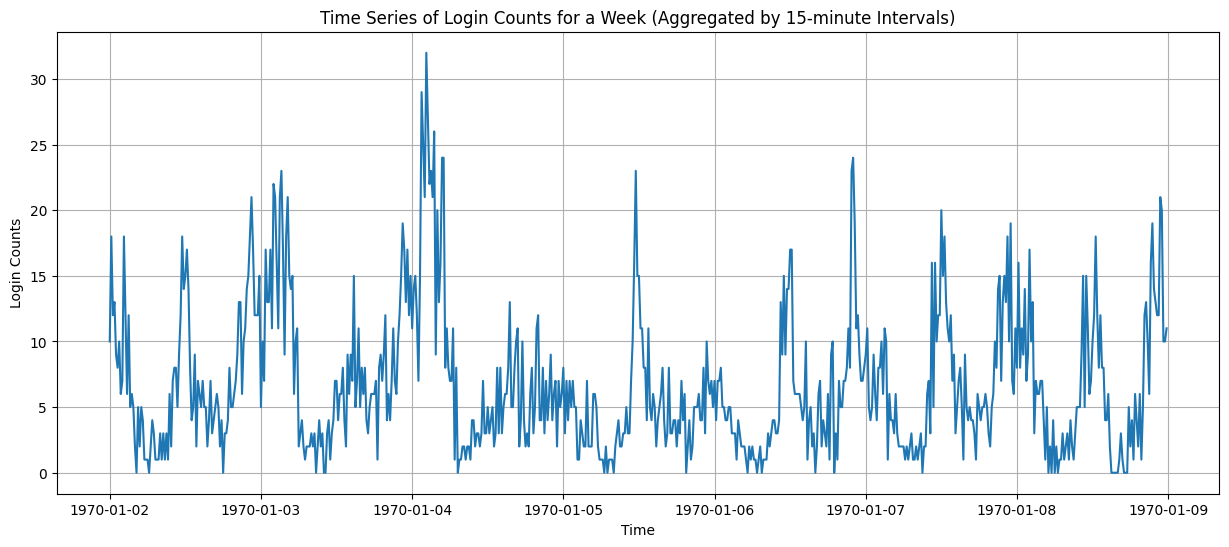

In [5]:
# Plot a week's worth of login counts to see daily cycles
week_data = logins_resampled.loc['1970-01-02':'1970-01-08']

plt.figure(figsize=(15, 6))
plt.plot(week_data.index, week_data['count'])
plt.title('Time Series of Login Counts for a Week (Aggregated by 15-minute Intervals)')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.grid(True)
plt.show()


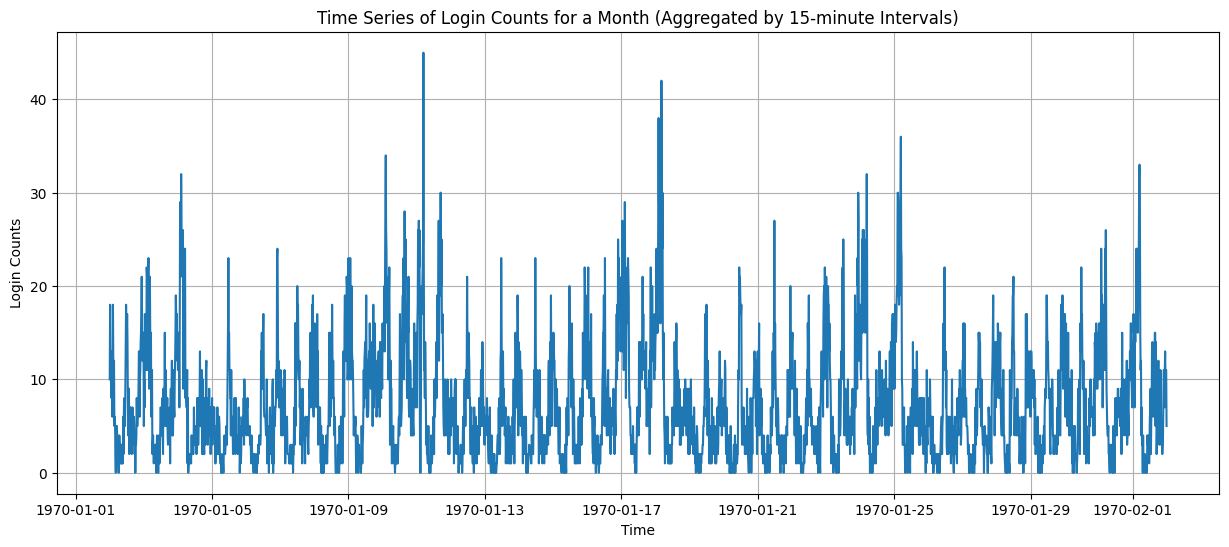

In [6]:
# Plot a month's worth of login counts to see broader trends or cycles
month_data = logins_resampled.loc['1970-01-02':'1970-02-01']

plt.figure(figsize=(15, 6))
plt.plot(month_data.index, month_data['count'])
plt.title('Time Series of Login Counts for a Month (Aggregated by 15-minute Intervals)')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.grid(True)
plt.show()


## Part 2 ‐ Experiment and metrics design

**1) Key Measure of Success:**
The key measure of success for this experiment would be the increase in the number of driver partners crossing the toll bridge and providing rides in both cities during the times when their circadian rhythms are complementary. This could be measured as the percentage increase in the total number of rides given by driver partners in the opposite city during their non-peak hours. For example, if drivers from Gotham are providing rides in Metropolis during Metropolis' daytime, and drivers from Metropolis are providing rides in Gotham during Gotham's nighttime, then the experiment can be considered successful.

**Reason for Choosing this Metric:**
This metric directly reflects the success of the experiment in encouraging driver partners to serve both cities during their non-peak hours. It captures the intended behavior change – drivers being more flexible and active in the opposite city during times when their home city is less active.

**2) Practical Experiment Design:**

a) **Implementation:**
1. **Baseline Data Collection:** Gather data for a defined period before implementing the toll reimbursement policy. This will serve as the baseline against which the experiment's impact will be compared.
2. **Toll Reimbursement:** Introduce the toll reimbursement policy, where driver partners are reimbursed for the toll costs when they cross the bridge between the two cities.
3. **Data Collection during Experiment:** Continue collecting data on driver activities, including the number of rides provided in both cities during their complementary circadian rhythm hours.

b) **Statistical Tests:**
1. **Paired t-test:** Compare the average number of rides given by driver partners in the opposite city during their non-peak hours before and after the toll reimbursement policy. This will help determine if the increase is statistically significant.
2. **Control Group:** Create a control group of driver partners who were not exposed to the toll reimbursement policy. Compare their behavior change with the experimental group using appropriate statistical tests.

c) **Interpretation and Recommendations:**
1. **Significant Increase:** If the paired t-test shows a statistically significant increase in the number of rides given in the opposite city during non-peak hours after implementing the toll reimbursement policy, this suggests that the policy has been effective in encouraging cross-city service.
2. **Control Group Comparison:** Comparing the experimental group with the control group can help verify that the changes are indeed due to the toll reimbursement policy and not other external factors.
3. **Recommendations:** If the experiment is successful, the city operations team can consider continuing the toll reimbursement policy to maintain the positive impact. Additionally, they could explore further incentives or adjustments to optimize driver behavior in both cities.
4. **Caveats:** It's important to consider potential confounding factors such as seasonal variations, holidays, or changes in demand patterns that might influence the results. Long-term effects and potential behavioral shifts among driver partners should also be monitored beyond the initial implementation.

In summary, the key to the success of this experiment lies in the significant increase in the number of rides provided by driver partners in the opposite city during their non-peak hours. A well-designed experimental approach with appropriate statistical analysis will help assess the impact of the toll reimbursement policy and provide valuable insights for decision-making.

# Part 3 ‐ Predictive modeling

In [8]:
# Load the JSON file into a DataFrame
file_path = 'ultimate_data_challenge.json'
ultimate_df = pd.read_json(file_path)

# Show the first few rows and the data structure
ultimate_df.head(), ultimate_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


(             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
 0  King's Landing                       4  2014-01-25                   4.7   
 1         Astapor                       0  2014-01-29                   5.0   
 2         Astapor                       3  2014-01-06                   4.3   
 3  King's Landing                       9  2014-01-10                   4.6   
 4      Winterfell                      14  2014-01-27                   4.4   
 
    avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
 0       1.10     2014-06-17   iPhone       15.4                 True   
 1       1.00     2014-05-05  Android        0.0                False   
 2       1.00     2014-01-07   iPhone        0.0                False   
 3       1.14     2014-06-29   iPhone       20.0                 True   
 4       1.19     2014-03-15  Android       11.8                False   
 
    weekday_pct  avg_dist  avg_rating_by_driver  
 0         46.2      3.67   

In [9]:
# Convert 'last_trip_date' and 'signup_date' to datetime objects
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])

# Find the most recent trip date in the dataset
most_recent_trip_date = ultimate_df['last_trip_date'].max()

# Calculate the cutoff date for determining user retention (30 days before the most recent trip date)
cutoff_date = most_recent_trip_date - pd.Timedelta(days=30)

# Create a new column to indicate if a user is retained
ultimate_df['retained'] = ultimate_df['last_trip_date'] >= cutoff_date

# Calculate the fraction of users that were retained
fraction_retained = ultimate_df['retained'].mean()

fraction_retained


0.37608

In [10]:
# Check the number of missing values in each column
missing_values = ultimate_df.isnull().sum()
missing_values


city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
retained                     0
dtype: int64

In [11]:
# Fill missing values for 'avg_rating_of_driver' and 'avg_rating_by_driver' with their respective means
ultimate_df['avg_rating_of_driver'].fillna(ultimate_df['avg_rating_of_driver'].mean(), inplace=True)
ultimate_df['avg_rating_by_driver'].fillna(ultimate_df['avg_rating_by_driver'].mean(), inplace=True)

# Fill missing values for 'phone' with 'Unknown'
ultimate_df['phone'].fillna('Unknown', inplace=True)

# Verify that there are no more missing values
ultimate_df.isnull().sum()


city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
retained                  0
dtype: int64

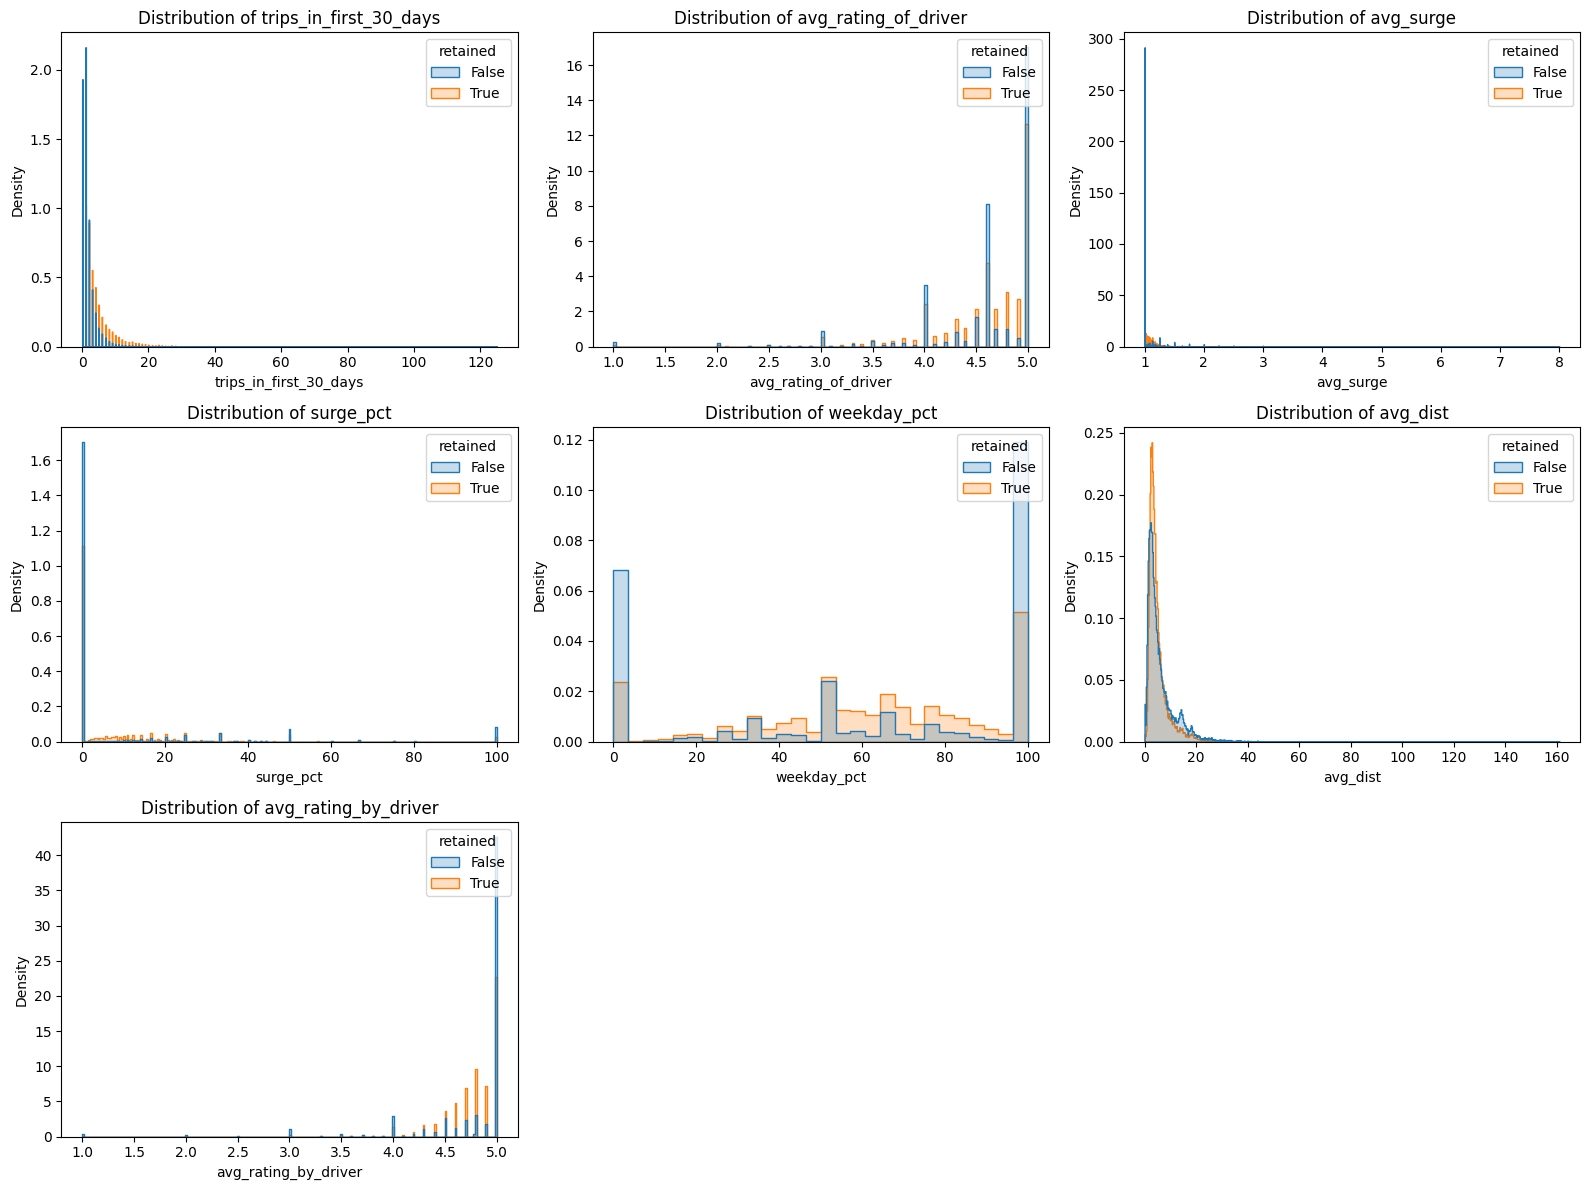

In [12]:
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# List of numerical features to plot
numerical_features = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']

# Plot the distribution of numerical features for retained and not retained users
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=ultimate_df, x=feature, hue='retained', element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


In [13]:
# Calculate the date that marks the beginning of the 6th month for each user
ultimate_df['start_of_6th_month'] = ultimate_df['signup_date'] + pd.DateOffset(months=5)

# Calculate the date that marks the end of the 6th month for each user
ultimate_df['end_of_6th_month'] = ultimate_df['signup_date'] + pd.DateOffset(months=6)

# Create a new column to indicate if a user is active in their 6th month
ultimate_df['active_6th_month'] = (ultimate_df['last_trip_date'] >= ultimate_df['start_of_6th_month']) & (ultimate_df['last_trip_date'] <= ultimate_df['end_of_6th_month'])

# Calculate the fraction of users that are active in their 6th month
fraction_active_6th_month = ultimate_df['active_6th_month'].mean()

fraction_active_6th_month


0.24514

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Drop date-related columns and 'retained' column as it is not needed for this prediction
ultimate_df.drop(['signup_date', 'last_trip_date', 'start_of_6th_month', 'end_of_6th_month', 'retained'], axis=1, inplace=True)

# Define features and target variable
X = ultimate_df.drop('active_6th_month', axis=1)
y = ultimate_df['active_6th_month']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# Create a column transformer that applies standard scaling to numerical features and one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Transform the features
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Show the shape of the transformed data
X_train_transformed.shape, X_test_transformed.shape


((40000, 15), (10000, 15))

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, conf_matrix


(0.7727,
 '              precision    recall  f1-score   support\n\n       False       0.83      0.88      0.85      7549\n        True       0.54      0.46      0.50      2451\n\n    accuracy                           0.77     10000\n   macro avg       0.69      0.67      0.67     10000\nweighted avg       0.76      0.77      0.77     10000\n',
 array([[6611,  938],
        [1335, 1116]], dtype=int64))